# Code alongs - CNN

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets.cifar10 import load_data

help(load_data)


Help on function load_data in module keras.src.datasets.cifar10:

load_data()
    Loads the CIFAR10 dataset.
    
    This is a dataset of 50,000 32x32 color training images and 10,000 test
    images, labeled over 10 categories. See more info at the
    [CIFAR homepage](https://www.cs.toronto.edu/~kriz/cifar.html).
    
    The classes are:
    
    | Label | Description |
    |:-----:|-------------|
    |   0   | airplane    |
    |   1   | automobile  |
    |   2   | bird        |
    |   3   | cat         |
    |   4   | deer        |
    |   5   | dog         |
    |   6   | frog        |
    |   7   | horse       |
    |   8   | ship        |
    |   9   | truck       |
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(50000, 32, 32, 3)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of l

In [5]:
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 31s 0us/step


In [7]:
# 50000 images, 32x32 for each image with 3 color channels(RGB)
x_train.shape

(50000, 32, 32, 3)

In [9]:
y_train.shape

(50000, 1)

In [12]:
# Remove extra dimension
y_train, y_test = y_train.ravel(), y_test.ravel()

In [13]:
y_train.shape

(50000,)

In [17]:
labels = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

labels_dict = {i:label for i, label in enumerate(labels)}
labels_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

<bound method Figure.tight_layout of <Figure size 1000x400 with 10 Axes>>

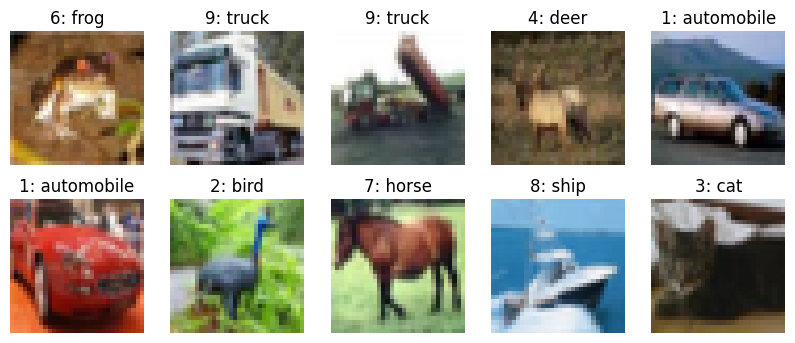

In [25]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i , ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.axis("off")
    ax.set_title(f"{y_train[i]}: {labels[y_train[i]]}")

fig.tight_layout

In [19]:
x_train[1].shape

(32, 32, 3)

In [20]:
x_train[1].flatten().min(), x_train[1].flatten().max()

(5, 254)

In [21]:
scaled_X_train = x_train.astype("float32") / 255
scaled_X_test = x_test.astype("float32") / 255

scaled_X_train.flatten().min(), scaled_X_train.flatten().max()

(0.0, 1.0)

## CNN model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam


def cnn_model(learning_rate=0.001, dropout_rate=0.5, kernels=[32, 64]):
    # optimizer which is used for learning
    adam = Adam(learning_rate=learning_rate)
    model = Sequential(name="CNN_model")

    # convolutional and subsampling layers
    for kernel in kernels:
        conv_layer = Conv2D(
            kernel,  # number of kernels in each layer
            kernel_size=(3, 3),  # also (5,5), (7,7) available
            activation="relu",  # good starting point
            kernel_initializer="he_normal",  # initializing weights, good to use wit relu
            input_shape=x_train.shape[1:],  # 32x32x3
        )

        model.add(conv_layer)
        model.add(
            MaxPooling2D(pool_size=(2, 2), strides=2)
        )  # note these can also be tuned

    # MLP part
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation="relu", kernel_initializer="he_normal"))
    model.add(
        Dense(10, activation="softmax")
    )  # softmax -> probabilities for each output

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = cnn_model(kernels=[32,64,32])
model.summary()

c:\Users\Erik\Documents\github\AI-Erik-Johansson-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 32)       │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,450 (286.91 KB)

 Trainable params: 73,450 (286.91 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=15)

model.fit(
    scaled_X_train,
    y_train,
    epochs=100,
    callbacks=[early_stopper],
    validation_split=1 / 5
)

Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - acc: 0.2031 - loss: 2.1229 - val_acc: 0.4570 - val_loss: 1.5121
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - acc: 0.4340 - loss: 1.5373 - val_acc: 0.5431 - val_loss: 1.2845
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - acc: 0.4996 - loss: 1.3723 - val_acc: 0.5767 - val_loss: 1.1887
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - acc: 0.5308 - loss: 1.2913 - val_acc: 0.5880 - val_loss: 1.1561
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 12ms/step - acc: 0.5628 - loss: 1.2156 - val_acc: 0.6276 - val_loss: 1.0722
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.5755 - loss: 1.1688 - val_acc: 0.6350 - val_loss: 1.0268
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.5978 - loss: 1.1168 - val_acc: 0.6532 - val_loss: 1.0049
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - acc: 0.6121 - loss: 1.0783 - val_acc: 0.6514 - val_loss: 0.9918
Epoch 9/100
1250

In [26]:
metrics= pd.DataFrame(model.history.history)
metrics.head()

,acc,loss,val_acc,val_loss
0,0.289300,1.889445,0.4570,1.512089
1,0.452900,1.492286,0.5431,1.284539
2,0.506900,1.353518,0.5767,1.188671
3,0.536425,1.276131,0.5880,1.156147
4,0.565750,1.209958,0.6276,1.072242


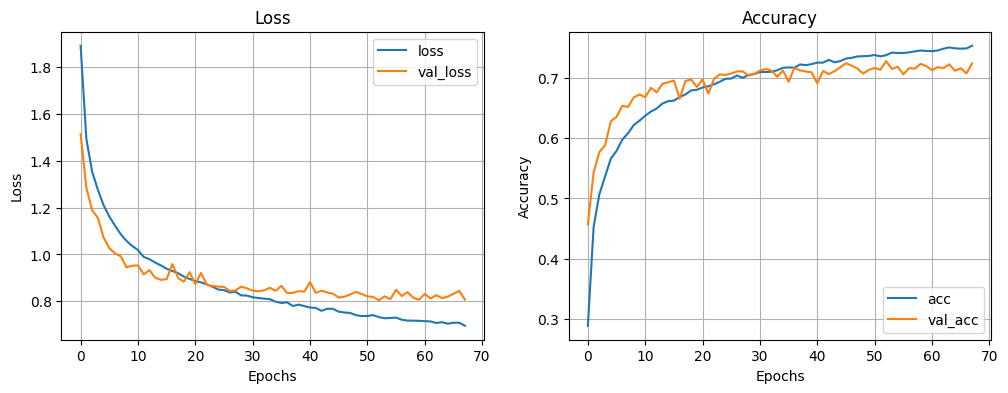

In [29]:
def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True, xlabel="Epochs", ylabel="Loss")
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True, xlabel="Epochs", ylabel="Accuracy")

plot_metrics(metrics)

## Hyperparameter tuning

- dropout rate
- learning rate
- different network configurations
- which type of pooling layer
- different optimizers
- ...

we pick dropout to tune

In [31]:
# short patience for demo
early_stopper = EarlyStopping(
    monitor="val_loss", mode="min", patience=3, restore_best_weights=True
)


def evaluate_model(**kwargs):
    model = cnn_model(**kwargs)
    # few epochs for demo
    model.fit(
        scaled_X_train,
        y_train,
        epochs=10,
        callbacks=[early_stopper],
        validation_split=1 / 5,
    )

    metrics = pd.DataFrame(model.history.history)
    # gets last epochs validation accuracy
    val_acc = metrics["val_acc"].iloc[-1]

    return val_acc

In [32]:
dropout_accuracies = {}

for dropout_rate in np.arange(.1,.6,.1):
    dropout_rate = np.round(dropout_rate,1)
    dropout_accuracies[dropout_rate] = evaluate_model(dropout_rate=dropout_rate)

c:\Users\Erik\Documents\github\AI-Erik-Johansson-OPA23\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - acc: 0.4089 - loss: 1.6666 - val_acc: 0.6085 - val_loss: 1.1310
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - acc: 0.6162 - loss: 1.0935 - val_acc: 0.6541 - val_loss: 0.9968
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - acc: 0.6847 - loss: 0.8962 - val_acc: 0.6793 - val_loss: 0.9346
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - acc: 0.7408 - loss: 0.7478 - val_acc: 0.6666 - val_loss: 0.9617
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - acc: 0.7837 - loss: 0.6235 - val_acc: 0.7067 - val_loss: 0.8766
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - acc: 0.8160 - loss: 0.5292 - val_acc: 0.6997 - val_loss: 0.9195
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - acc: 0.8454 - loss: 0.4392 - val_acc: 0.7031 - val_loss: 0.9596
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - acc: 0.8804 - loss: 0.3452 - val_acc: 0.7040 - val_loss: 1.0324
Epoch 1/10
1250/1250 ━━━